### Treść zadania

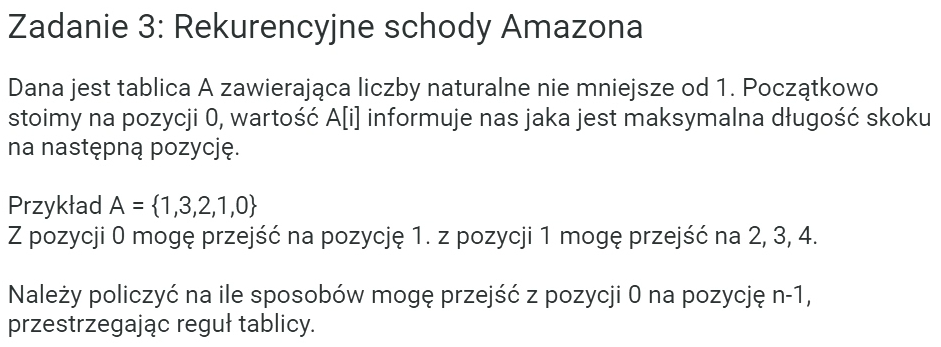

### Omówienie

###### Podejście Top-down
- Funkcja rekurencyjna: <br>
Wyznaczamy sumę wszystkich możliwych sposobów dojścia do końca (przeskoczenia z indeksu $ 0 $ do $ n - 1 $, wykonując skoki z wykorzystaniem pól między tymi indeksami) w sposób rekurencyjny. Zatem, jeżeli chcemy wyznaczyć liczbę sposobów dojścia z pola o indeksie $ i $ do pola o indeksie $ n - 1 $, musimy znać liczbę sposobów dojścia do pola $ n - 1 $ ze wszystkich pól, na które możemy przeskoczyć z pola $ i $. Najłatwiej jest w pętli wywołać funkcję rekurencyjną dla wszystkich pól, na które możemy wejść z pola $ i $, a następnie zsumować liczbę sposobów dojścia do końca z każdego z tych pól i zapisać jako liczbę sposobów dojścia z pola $ i $ do końca (zapisujemy w pomocniczej tablicy, w której spamiętujemy liczbę sposobów).
<br><br>
- Warunki końca rekurencji: <br>
1. Wskoczyliśmy na pole o indeksie $ n - 1 $, więc dotarliśmy do celu. Zwracamy zatem 1, bo znaleźliśmy 1 nowy sposób dojścia do celu, <br>
2. Wyskoczyliśmy poza zakres, a więc $ i $ >= $ n $. Wówczas zwracamy 0, bo spoza tablicy już się nie cofniemy do celu, więc nie da się do niego dotrzeć, <br>
3. Trafiliśmy na pole, dla którego już wyznaczyliśmy liczbę sposobów dojścia do celu. Wówczas nie liczymy jej od nowa, tylko zwracamy tę wartość.

###### Podejście Bottom-up:
- Funkcja iteracyjna: <br>
Przechodzimy w pierwszej pętli przez wszystkie kolejne pola. W drugiej (wewnątrznej pętli), skanujemy wszystkie następne wartości (takie, dla których $ j \gt i $, gdzie $ i $ - indeks elementu w zewnętrznej pętli, $ j $ - indeks elementu w wewnętrznej pętli) i zwiększamy liczbę sposobów dojścia do każdej $ j $. wartości, powiększając zapisaną wartość w tablicy pomocniczej. Zatem w każdym polu tej tablicy znajdzie się łączna liczba sposobów dojścia do tego pola z pierwszego pola tablicy (o indeksie $ 0 $). <br>
Tutaj bardzo ważna jest obserwacja, że jeżeli do pola $ i - 1 $ mogliśmy dojść na $ k $ sposobów, to dla każdego spośród pól, na które możemy skoczyć z pola $ i - 1 $, zwiększa się liczba sposobów, na które do niego dotrzemy o $ k $. Dlatego w wewnętrznej pętli do każdego $ j $. pola dodajemy wartość z pola, z którego wchodzimy na to pole, a więc z pola o indeksie $ i $.

### Implementacja

#### Top-down

In [1]:
def count_jumps_td(A):
    n = len(A)
    counts = [0] * n

    def jump(i):
        if i == n - 1: return 1
        if i >= n: return 0
        if not counts[i]:
            for j in range(1, A[i] + 1):
                counts[i] += jump(i + j)
        return counts[i]
    
    return jump(0)

#### Bottom-up

In [2]:
def count_jumps_bu(A):
    n = len(A)
    counts = [0] * n
    counts[0] = 1
    
    for i in range(n - 1):
        for j in range(i + 1, min(i + 1 + A[i], n)):
            counts[j] += counts[i]

    return counts[n - 1]

###### Kilka testów

In [3]:
import random

# A = [1, 3, 2, 1, 0]  # 4
# A = [2, 1, 3, 2, 1, 0]  # 8
A = [random.randint(1, 10) for _ in range(random.randint(5, 20))]


print('Input:', A)
print('Top-down: ', count_jumps_td(A))
print('Bottom-up:', count_jumps_bu(A))

Input: [10, 6, 4, 4, 9, 10, 2, 3, 3, 6, 7, 7]
Top-down:  761
Bottom-up: 761
